In [3]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import matplotlib.ticker as ticker
from mplfinance.original_flavor import candlestick2_ohlc
import numpy

In [4]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import matplotlib.ticker as ticker
from mplfinance.original_flavor import candlestick2_ohlc
import numpy

In [5]:
event = "kakao"
event_number = "035720"
start = datetime.datetime(2021,7,1)
end = datetime.datetime(2021,9,18)


In [6]:
table = pdr.naver.NaverDailyReader(event_number,start,end).read()
#table = pdr.DataReader(event_number+".KS",event,start,end)

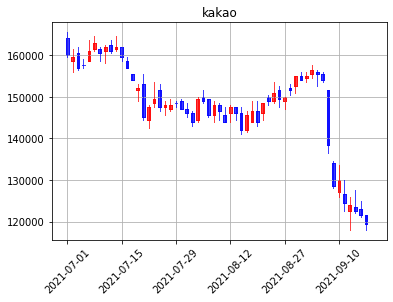

In [7]:
#plt.plot(table['Close'])
#plt.plot(table.index,table['Close'])
table = table.astype(int)
fig, ax = plt.subplots()

x_date = table.index.astype(str)
ax.plot(x_date,[numpy.nan for _ in range(len(x_date))])
ax.xaxis.set_major_locator(ticker.AutoLocator())

candlestick2_ohlc(ax,table['Open'],table['High'],table['Low'],table['Close'],width=0.5,colorup='r',colordown='b')
plt.xticks(rotation=45)
plt.grid()
plt.title(event)
plt.show()

# 이평선

In [8]:
ma5 = table['Close'].rolling(window = 5).mean()
ma10 = table['Close'].rolling(window = 10).mean()
ma30 = table['Close'].rolling(window = 30).mean()

table.insert(len(table.columns),"MA5",ma5)
table.insert(len(table.columns),"MA10",ma10)
table.insert(len(table.columns),"MA30",ma30)


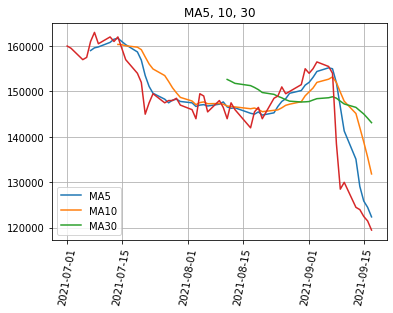

In [9]:
plt.plot(table[['MA5','MA10','MA30']],label=["MA5","MA10","MA30"])
plt.plot(table.index,table['Close'])
plt.legend(loc = 'best')
plt.xticks(rotation=80)
plt.title('MA5, 10, 30')
plt.grid()
plt.show()

In [10]:
# 추가 설명 (Yahoo Finance에서 종목코드 찾기)

# https://finance.yahoo.com에 접속해서
# 검색창에 희망하는 기업 영문명 입력
# 아래 기업 영문명 좌측 코드가 종목코드
#####
